In [1]:
# import libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import random
random.seed(25)

In [2]:
# generating toy dataset
exam_1 = []
exam_2 = []
final = []
extra = []
grade = []

for i in range(150):
    exam_1.append(random.randint(55, 98))
    exam_2.append(random.randint(40, 88))
    final.append(random.randint(52, 94))
    extra.append(random.randint(0,2))
    grade.append((0.25*exam_1[i]) + (0.25*exam_2[i]) + (0.5*final[i]) + extra[i])

grades = pd.DataFrame(columns=['exam_1', 'exam_2', 'final', 'extra' ,'grade'])
grades['exam_1'] = exam_1
grades['exam_2'] = exam_2
grades['final'] = final
grades['extra'] = extra
grades['grade'] = grade

In [3]:
# defining features
X = grades[['exam_1', 'exam_2', 'final', 'extra']]

# defining target
y = grades['grade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 25
)

Untuned Model

In [19]:
# Create an instance of XGBRegressor
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators= 10,
    seed = 25
)

# Fit
xg_reg.fit(X_train, y_train)

# Prediction
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))

print('RMSE: %f' % (rmse))
print('Score:', xg_reg.score(X_test, y_test))

RMSE: 3.301374
Score: 0.7578821964635867


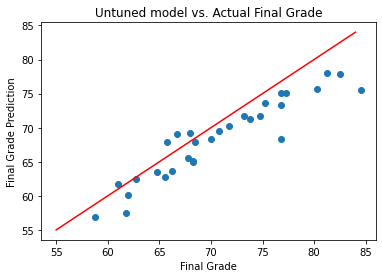

In [5]:
# Plotting untuned model vs test values
plt.scatter(y_test, preds);
plt.xlabel('Final Grade')
plt.ylabel('Final Grade Prediction')
plt.title('Untuned model vs. Actual Final Grade')
plt.plot(range(55,85), range(55, 85), color = 'red');

Tuned Model

In [14]:
from sklearn.model_selection import GridSearchCV

# create DMatrix
xgb.DMatrix(
    data = X,
    label = y
)

# parameter grid
gbm_param_grid = {
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.25, 0.5, 1],
    'subsample': [0.25, 0.5, 1],
    'n_estimators': [100],
    'max_depth': [2, 5]
    }

# regressor instance
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(
    estimator = gbm,
    param_grid = gbm_param_grid,
    scoring = 'r2',
    cv = 4,
    verbose = 1
)

grid_mse.fit(X, y)

print('Best params', grid_mse.best_params_)
print('Best score:', grid_mse.best_score_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best params {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.25}
Best score: 0.98263882036445


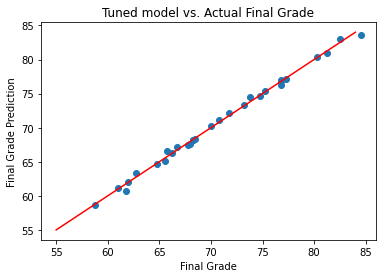

In [7]:
# Plotting tuned model predictions vs test values
t_preds = grid_mse.predict(X_test)

plt.scatter(y_test, t_preds);
plt.xlabel('Final Grade')
plt.ylabel('Final Grade Prediction')
plt.title('Tuned model vs. Actual Final Grade')
plt.plot(range(55,85), range(55, 85), color = 'red');

Linear Regression

In [18]:
# Instantiate Linear Regression object
lr = LinearRegression()

# Fit
lr.fit(X_train, y_train)

# Make predictions
lr_preds = lr.predict(X_test)

# Score
print('Score:', lr.score(X_test, y_test))

Score: 1.0


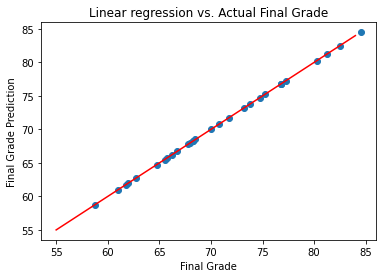

In [9]:
# Comparing Linear Regression predictions to Actual Values
plt.scatter(y_test, lr_preds);
plt.xlabel('Final Grade')
plt.ylabel('Final Grade Prediction')
plt.title('Linear regression vs. Actual Final Grade')
plt.plot(range(55,85), range(55, 85), color = 'red');

Linear Regression is a perfect match since our target column follows a linear formula of:

y = 0.25a + 0.25b + 0.5c + d